In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Mounted at /content/drive/


# Importing the Yelp Dataset

In [2]:
yelp_df = pd.read_csv('/content/drive/MyDrive/DM_Assignment_02_Dataset.csv')
yelp_df

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,26/1/2011,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,27/7/2011,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
3,Active Life; Dog Parks; Parks,Scottsdale,_1QQZuf4zZOyFCvXc0o6Vg,27/5/2010,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg
4,Tires; Automotive,Mesa,6ozycU1RpktNG2-1BroVtw,5/1/2012,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw
...,...,...,...,...,...,...,...,...
229902,Gastropubs; Restaurants,Tempe,vnffHkFJbmd-J3OaBbK2Eg,14/4/2011,2,I really wanted to like this place because it'...,0,6e7pZofhDuIlD_rX2oYirQ
229903,Hotels & Travel; Event Planning & Services; Ho...,Peoria,l5oUrgQ190l8CcN8uzd_pA,23/1/2011,1,My husband I stayed here for two nights. Of c...,2,dDNfSFT0VApxPmURclX6_g
229904,Pubs; Bars; American (Traditional); Nightlife;...,Tempe,#NAME?,11/10/2010,4,Cool atmosphere. A lot of beers on tap and goo...,0,M5wHt6Odh1k5v0tIjqd8DQ
229905,Wine Bars; Bars; Pizza; Nightlife; Restaurants,Tempe,YQvg0JCGRFUkb6reMMf3Iw,18/1/2011,3,I have to take a star off for the spotty servi...,2,jopndPrv-H5KW2CfScnw9A


In [ ]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229907 entries, 0 to 229906
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   business_categories  229130 non-null  object
 1   business_city        229907 non-null  object
 2   business_id          229907 non-null  object
 3   date                 229907 non-null  object
 4   stars                229907 non-null  int64 
 5   text                 229901 non-null  object
 6   useful               229907 non-null  int64 
 7   user_id              229907 non-null  object
dtypes: int64(2), object(6)
memory usage: 14.0+ MB


# **1)Check and remove missing data**

In [3]:
missing_value = yelp_df.isnull().sum()
missing_value

business_categories    777
business_city            0
business_id              0
date                     0
stars                    0
text                     6
useful                   0
user_id                  0
dtype: int64

length Before Removing Null values

In [5]:
len(yelp_df)

229124

Length After Removing Null Values

In [26]:
yelp_df = yelp_df.dropna(subset=['business_categories','text'])

#to be used in the final ploting
clean_df=yelp_df.dropna(subset=['business_categories','text'])
len(yelp_df)


222759

#  **2)Check and remove invalid data**

In [6]:
#After removing #Value! from business_id column

invalid_value = yelp_df.business_id != '#VALUE!'
print('#VALUE! appears =', len(yelp_df) - len(yelp_df[invalid_value]) ,'Times')#it appears 11 times

#Removing the value
yelp_df=yelp_df[invalid_value]


#VALUE! appears = 11 Times


In [7]:
#After removing #NAME? from business_id column

invalid_name = yelp_df.business_id != '#NAME?'
print('#NAME? appears =', len(yelp_df) - len(yelp_df[invalid_name]) ,'Times')#it appears 3707 times

#Removing the value
yelp_df=yelp_df[invalid_name]


#NAME? appears = 3707 Times


# user_id column

In [8]:
#After removing #Value! from user_id column

invalid_value1 = yelp_df.user_id != '#VALUE!'
print('#VALUE! appears =', len(yelp_df) - len(yelp_df[invalid_value1]) ,'Times')#it appears 0 time
#since it appears zero time we aint removing anything

#VALUE! appears = 0 Times


In [9]:
#After removing #NAME? from user_id column

invalid_name1 = yelp_df.user_id != '#NAME?'
print('#NAME? appears =', len(yelp_df) - len(yelp_df[invalid_name1]) ,'Times')#it appears 2647 times

#Removing the value
yelp_df=yelp_df[invalid_name1]

#NAME? appears = 2647 Times


# **After removing Invalid Data**

In [10]:
len(yelp_df)

222759

# **3)Random Subset Selection of Yelp Businesses by City**

In [11]:
import random

random.seed(42)
unique_cities = yelp_df['business_city'].unique()
unique_cities



array(['Phoenix', 'Tempe', 'Scottsdale', 'Mesa', 'Chandler', 'Gilbert',
       'Glendale', 'Tolleson', 'Surprise', 'Paradise Valley', 'Peoria',
       'Buckeye', 'Florence', 'Avondale', 'Sun City', 'Goodyear',
       'Anthem', 'Cave Creek', 'Youngtown', 'Queen Creek',
       'Fountain Hills', 'Fountain Hls', 'Sun Lakes', 'Fort McDowell',
       'Apache Junction', 'Litchfield Park', 'Morristown', 'Waddell',
       'Carefree', 'Laveen', 'Wickenburg', 'Casa Grande', 'Guadalupe',
       'Maricopa', 'Gold Canyon', 'San Tan Valley', 'North Scottsdale',
       'Tortilla Flat', 'Sun City West', 'Good Year', 'Ahwatukee',
       'Scottsdale ', 'Rio Verde', 'Coolidge', 'Gila Bend', 'El Mirage',
       'Higley', 'Saguaro Lake', 'Goldfield', 'Tucson', 'Yuma',
       'Charleston', 'Pheonix', 'Stanfield', 'Glendale Az', 'North Pinal',
       'Sun City Anthem', 'Grand Junction', 'Tonopah', 'Wittmann',
       'Tonto Basin'], dtype=object)

In [18]:
selected_cities = random.sample(list(unique_cities), 10)
sample_data = yelp_df[yelp_df['business_city'].isin(selected_cities)]
sample_data

,business_categories,business_city,business_id,date,stars,text,useful,user_id
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
13,Tattoo; Beauty & Spas,Tempe,WGNIYMeXPyoWav1APUq7jA,23/12/2011,4,"Good tattoo shop. Clean space, multiple artist...",2,Xm8HXE1JHqscXe5BKf0GFQ
50,Sushi Bars; Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0,jdoGEEy5s-5L1O_lNzEi2g
53,Arts & Entertainment; Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4,We got passes for the preview of Mission Impos...,0,Mb0psF4WQF7gZSuZafVr-g
57,Food; Donuts; Coffee & Tea,Tempe,o5x6DF0KK1OBsiUOx2gavg,4/2/2010,4,"This would most certainly be ""my"" coffee shop ...",0,xw77viWz_BbmyntxoBVH4A
...,...,...,...,...,...,...,...,...
229881,Sushi Bars; Restaurants,Tempe,rwQIBAM_kHtVl1Ks8Flexw,28/8/2010,1,We used the Restaurant.com $25 off of $35 or m...,0,KucBnMrhalzxnD9AWrxwYQ
229889,Delis; Sandwiches; Restaurants,Tempe,cE99Cjrj2YXSGs4MECb86w,19/10/2007,3,You want a monster sandwich that will challeng...,6,tlSSQwfHYJany7wPoTH46A
229893,American (Traditional); Restaurants,Tempe,c8XlQvVNwKhH9BOHEObtNQ,16/12/2011,4,"Went for lunch at Claim Jumper, let me tell yo...",0,8dbRf1UsWp2ktXHZ6Zv06w
229902,Gastropubs; Restaurants,Tempe,vnffHkFJbmd-J3OaBbK2Eg,14/4/2011,2,I really wanted to like this place because it'...,0,6e7pZofhDuIlD_rX2oYirQ


In [19]:
print('Length of resulting sample data :',len(sample_data))

Length of resulting sample data : 29320


# **4)summary statistics for the `stars` column of the sample data**

In [20]:
import numpy as np

count=len(sample_data.stars)
mean=np.mean(sample_data.stars)
std=np.std(sample_data.stars)
min=np.min(sample_data.stars)
max=np.max(sample_data.stars)

print('Count              :',count)
print('Standard Deviation :',std)
print('Means              :',mean)
print('Min                :',min)
print('Max                :',max)



Count              : 29320
Standard Deviation : 1.2274563392624882
Means              : 3.7207708049113233
Min                : 1
Max                : 5


## **5)For each city in the dataframe, how many unique businesses are there?**

In [22]:
business_count = sample_data.groupby('business_city')['business_categories'].nunique().reset_index()
business_count.columns = ['business_city', 'count']

# summary statistics
summary_stats = business_count['count'].describe()
business_count


,business_city,count
0,Avondale,88
1,El Mirage,7
2,Florence,10
3,Gila Bend,9
4,Guadalupe,3
5,San Tan Valley,6
6,Scottsdale,2
7,Sun City,24
8,Sun City West,7
9,Tempe,502


In [23]:

# Print the summary statistics
count=len(business_count)
mean=np.mean(summary_stats)
std=np.std(summary_stats)
min=np.min(summary_stats)
max=np.max(summary_stats)

print('Count              :',count)
print('Standard Deviation :',std)
print('Means              :',mean)
print('Min                :',min)
print('Max                :',max)

Count              : 10
Standard Deviation : 160.86010763386017
Means              : 96.24433807918624
Min                : 2.0
Max                : 502.0


#6)For each business category and business ID combination in the dataframe, how many unique users have rated the business?

In [24]:
user_count=sample_data.groupby(['business_id','business_categories'])['user_id'].nunique().reset_index()
user_count.columns=['business_id' , 'business_categories' , 'count']

summary_stats = user_count['count'].describe()
user_count



,business_id,business_categories,count
0,-5rFC4EVrT-v8g1PSEf6Xg,Asian Fusion; Restaurants,33
1,-8aZ0v511M1zpoZAC3N3VA,Food; Weight Loss Centers; Juice Bars & Smooth...,6
2,03m0CGFwEInR8ZBGrqmO7w,"Used, Vintage & Consignment; Fashion; Shopping",5
3,04SKYBXRAqeYIuuVDzwKNg,Tex-Mex; Restaurants,10
4,07a5t3hYhtPHlBviiETUpA,Banks & Credit Unions; Financial Services,3
...,...,...,...
1318,zonV2F6YNVn2_sI5dK82eg,Middle Eastern; Mediterranean; Restaurants,45
1319,zqmCS5Qx25ELcNek0uc4zw,Arts & Entertainment; Psychics & Astrologers,3
1320,zsMNY7nDppcceMgzKp6eZg,Local Services; Pest Control,3
1321,zxjMiqlfUuIQRltSuj9FpQ,Ice Cream & Frozen Yogurt; Food; Restaurants; ...,11


In [25]:

# Print the summary statistics
count=len(user_count)
mean=np.mean(summary_stats)
std=np.std(summary_stats)
min=np.min(summary_stats)
max=np.max(summary_stats)

print('Count              :',count)
print('Standard Deviation :',std)
print('Means              :',mean)
print('Min                :',min)
print('Max                :',max)

Count              : 1323
Standard Deviation : 460.2796339985644
Means              : 267.8729794132423
Min                : 2.0
Max                : 1323.0


# **7) Plotting and Analysis**

**For Cleaned Data set**

In [27]:
variables_of_interest = ['business_categories',	'business_city',	'business_id',	'date',	'stars',	'text',	'useful',	'user_id']
correlation_data = clean_df[variables_of_interest]

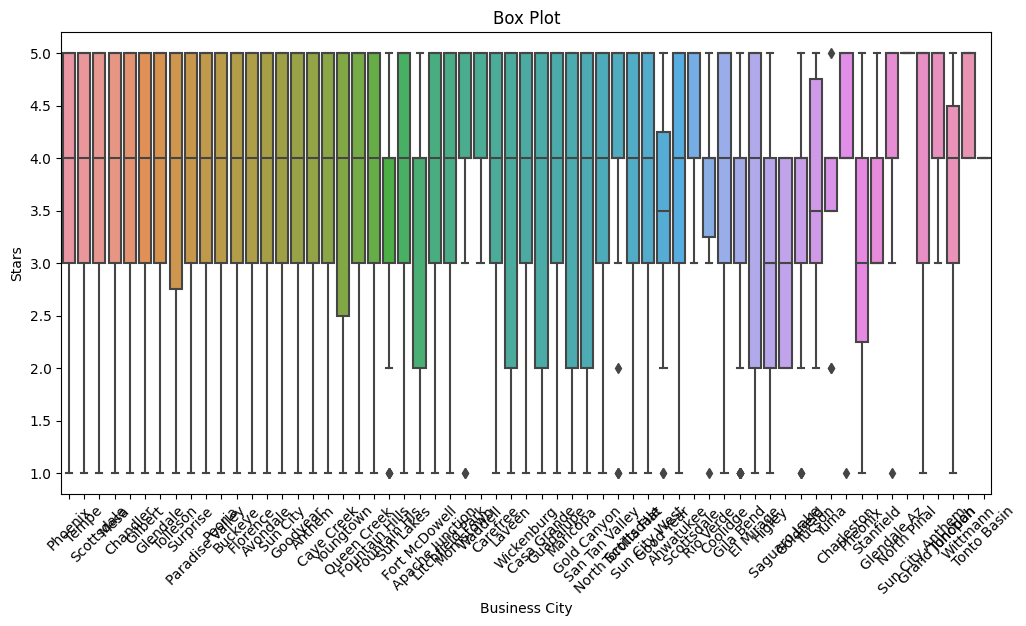

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=correlation_data, x='business_city', y='stars')
plt.xticks(rotation=45)
plt.title('Box Plot')
plt.xlabel('Business City')
plt.ylabel('Stars')
plt.show()

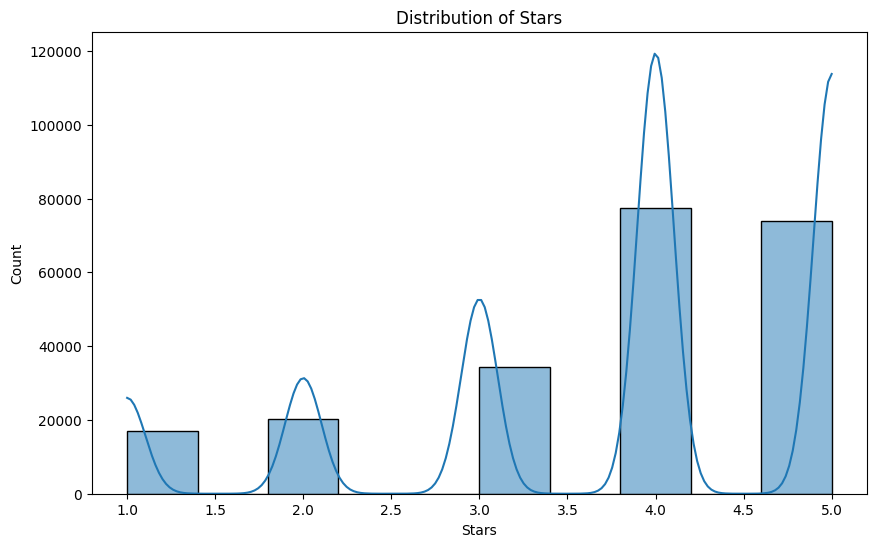

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['stars'], bins=10, kde=True)
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Distribution of Stars')
plt.show()

<ipython-input-31-f9d9d54daacd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clean_df[['business_city', 'useful', 'business_categories', 'stars']].corr()


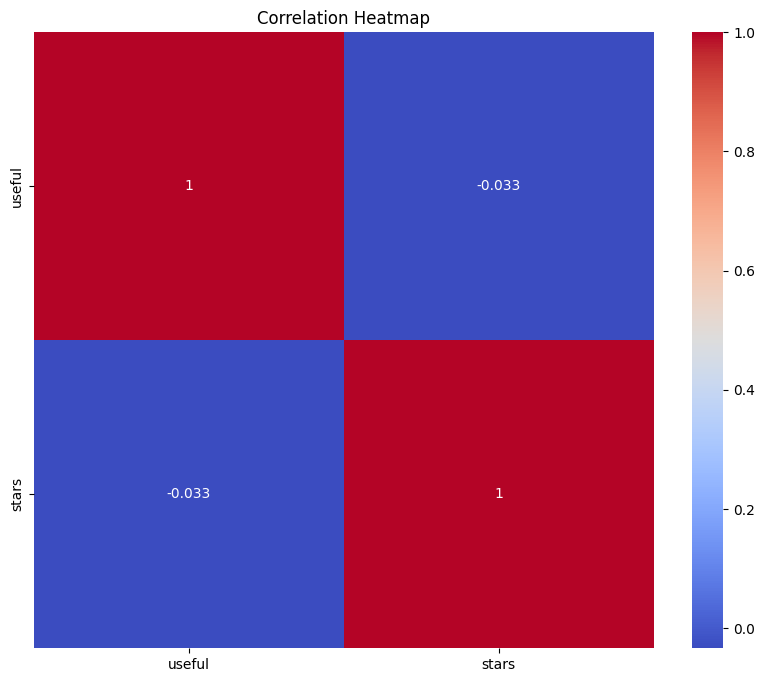

In [31]:
corr = clean_df[['business_city', 'useful', 'business_categories', 'stars']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
summary_stats = clean_df.describe(include='all')
print(summary_stats)


         business_categories business_city             business_id      date  \
count                 222759        222759                  222759    222759   
unique                  2038            61                   11200      2504   
top     Mexican; Restaurants       Phoenix  hW0Ne_HTHEAgGF1rAdmR-g  3/1/2013   
freq                   14282         93121                     832       359   
mean                     NaN           NaN                     NaN       NaN   
std                      NaN           NaN                     NaN       NaN   
min                      NaN           NaN                     NaN       NaN   
25%                      NaN           NaN                     NaN       NaN   
50%                      NaN           NaN                     NaN       NaN   
75%                      NaN           NaN                     NaN       NaN   
max                      NaN           NaN                     NaN       NaN   

                stars    text         u

**For Sample Data Set**

In [33]:
variables_of_interest = ['business_categories',	'business_city',	'business_id',	'date',	'stars',	'text',	'useful',	'user_id']
correlation_data = sample_data[variables_of_interest]

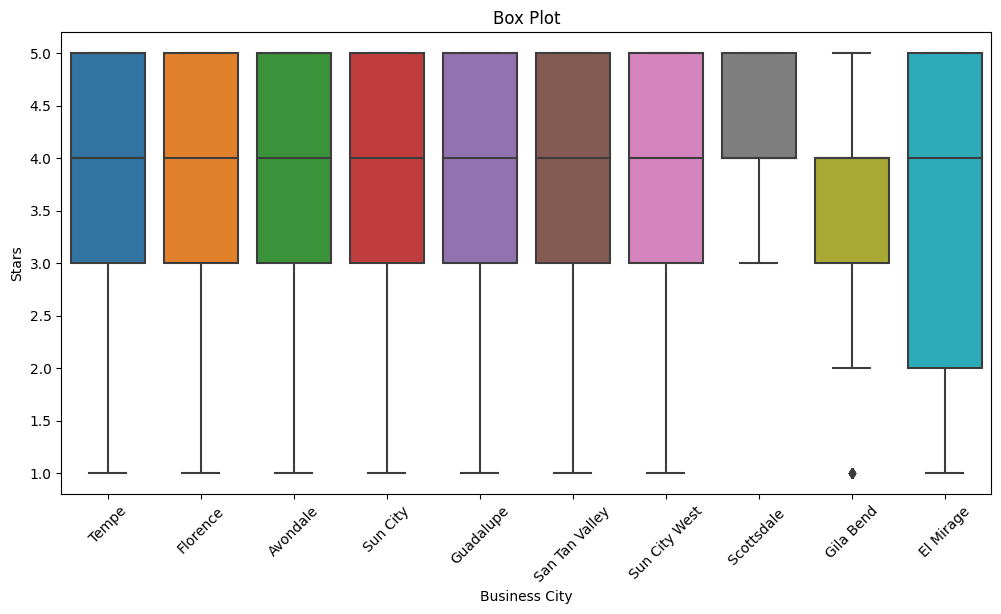

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=correlation_data, x='business_city', y='stars')
plt.xticks(rotation=45)
plt.title('Box Plot')
plt.xlabel('Business City')
plt.ylabel('Stars')
plt.show()

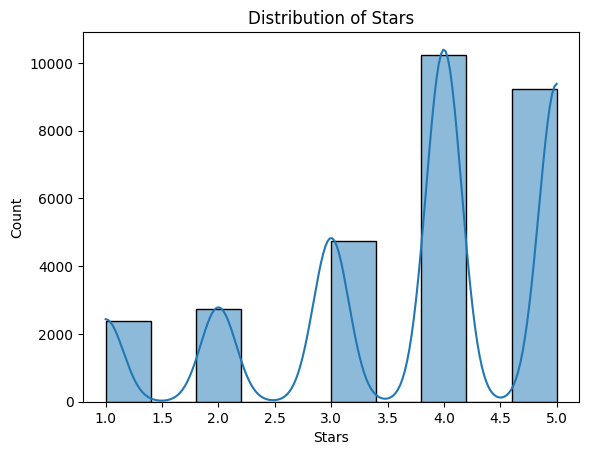

In [35]:
sns.histplot(sample_data['stars'], bins=10, kde=True)
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Distribution of Stars')
plt.show()

<ipython-input-36-cafd873816c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sample_data[['business_city', 'useful', 'business_categories', 'stars']].corr()


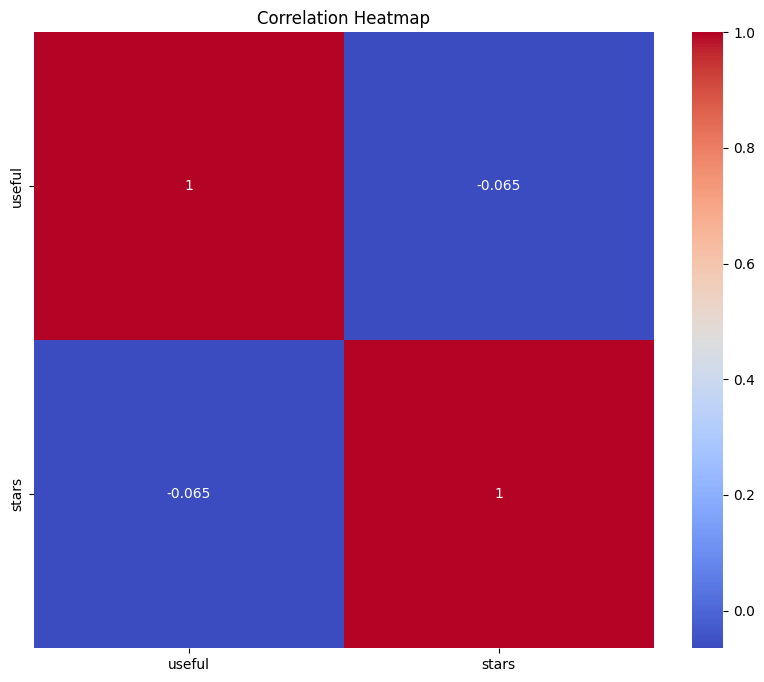

In [36]:
corr = sample_data[['business_city', 'useful', 'business_categories', 'stars']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
summary_stats = sample_data.describe(include='all')
print(summary_stats)

         business_categories business_city             business_id       date  \
count                  29320         29320                   29320      29320   
unique                   551            10                    1323       2239   
top     Mexican; Restaurants         Tempe  JokKtdXU7zXHcr20Lrk29A  22/8/2012   
freq                    1721         27388                     718         57   
mean                     NaN           NaN                     NaN        NaN   
std                      NaN           NaN                     NaN        NaN   
min                      NaN           NaN                     NaN        NaN   
25%                      NaN           NaN                     NaN        NaN   
50%                      NaN           NaN                     NaN        NaN   
75%                      NaN           NaN                     NaN        NaN   
max                      NaN           NaN                     NaN        NaN   

               stars       

# **Summary**
The first and crucial step in the analysis process is to understand the dataset. In the case of the Yelp dataset, it contains 8 columns, namely: business_categories, business_city, business_id, date, stars, text, useful, and user_id. By exploring the dataset, you examined the tables, columns, and their descriptions to gain familiarity with the data structure and the potential relevance of each column to your analysis.

After the data exploration, the next step was data cleaning. This involved removing rows that had missing values or invalid entries. By performing this cleaning process, you ensured the dataset was in a suitable state for further analysis.

Following data cleaning, you proceeded with a descriptive analysis of the cleaned data. This involved calculating basic descriptive statistics such as mean, median, and standard deviation for numerical variables. For categorical variables, you counted the frequencies of different categories. These summary statistics helped provide initial insights into the dataset, allowing you to understand the central tendencies, variabilities, and distributions of the variables.

Finally, you conducted visual exploration by creating various visualizations such as histograms, box plots, and heatmaps. These visual representations allowed you to gain a deeper understanding of the relationships between variables and uncover patterns and trends that might not be readily apparent in the raw data. Visualizations can be particularly effective in revealing insights and facilitating data interpretation.

By following these steps of data exploration, cleaning, descriptive analysis, and visual exploration, you obtained a comprehensive understanding of the Yelp dataset, its variables, and their relationships, setting the foundation for further analysis and insights.